In [1]:
# Load libraries and the per-wav TCAV metrics dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
import umap
df = pd.read_csv('tcav.csv')


## PCA 2D 

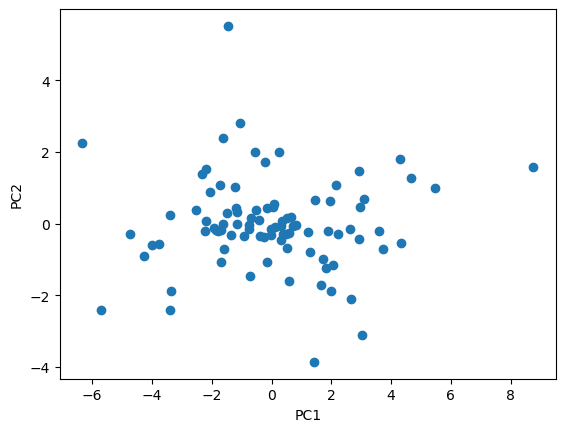

In [ ]:
# Standardize all TCAV features and run an overall 2D PCA
X = df.drop(columns=['wav_name'])
scaler = StandardScaler() # between 0 - 1 ;  no need to !  /. halbana ?  . 
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [3]:
# Split the dataset into separate dataframes per speaker
df_eden = df[df.wav_name.str.startswith('eden')].copy()
df_idan = df[df.wav_name.str.startswith('idan')].copy()
df_yoav = df[df.wav_name.str.startswith('yoav')].copy()


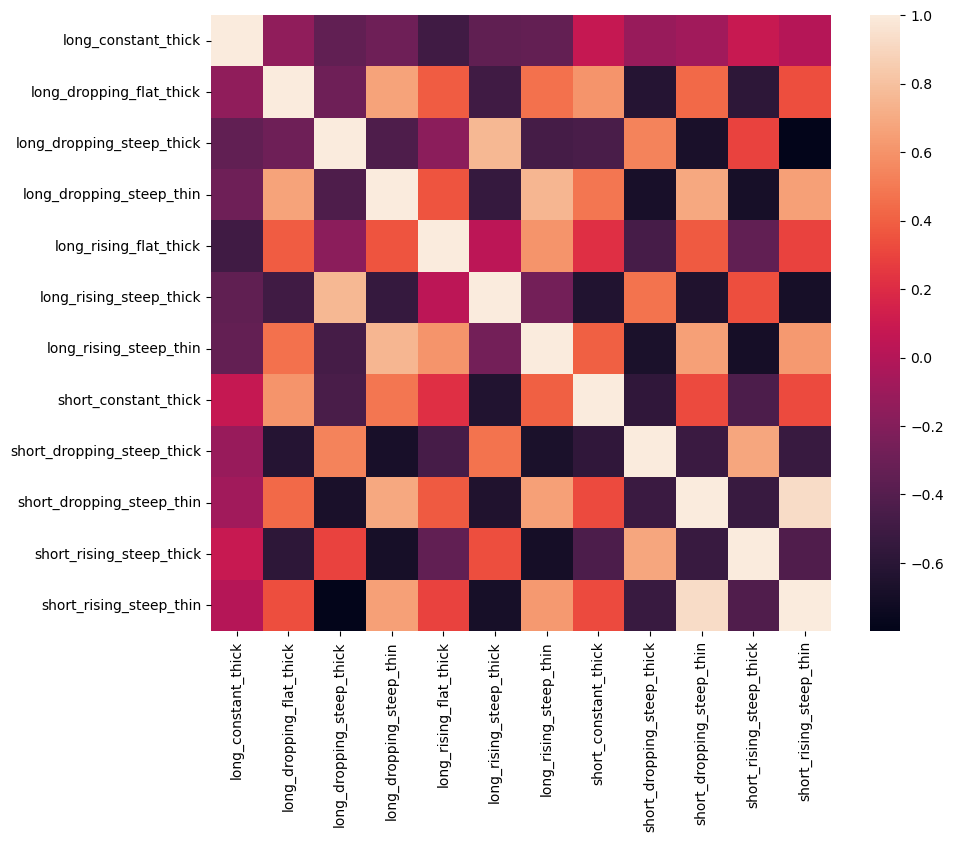

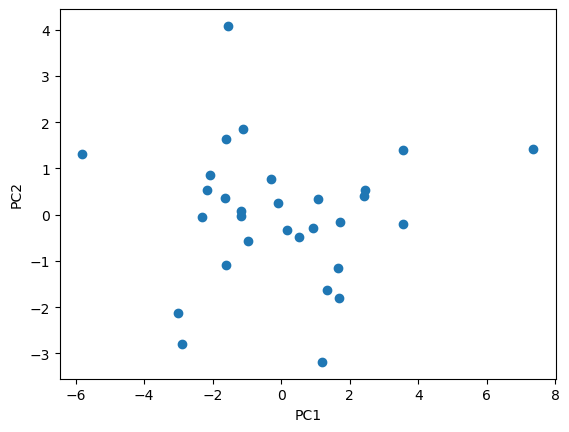

PCA Loadings:
[[-0.02706959  0.28559414 -0.28856434  0.34625023  0.19608318 -0.28691501
   0.32581404  0.2618399  -0.3298267   0.3371326  -0.29707505  0.32918572]
 [ 0.59255741 -0.11384275 -0.35425439 -0.13789315 -0.43390926 -0.41248534
  -0.26182204  0.11068958  0.02196154  0.06167125  0.15694779  0.15251957]]


In [4]:
# Eden-only correlation heatmap plus 2D PCA and loadings
plt.figure(figsize=(10,8))
sns.heatmap(df_eden.drop(columns=['wav_name']).corr(), annot=False)
plt.show()

X = df_eden.drop(columns=['wav_name'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
print('PCA Loadings:')
print(pca.components_)

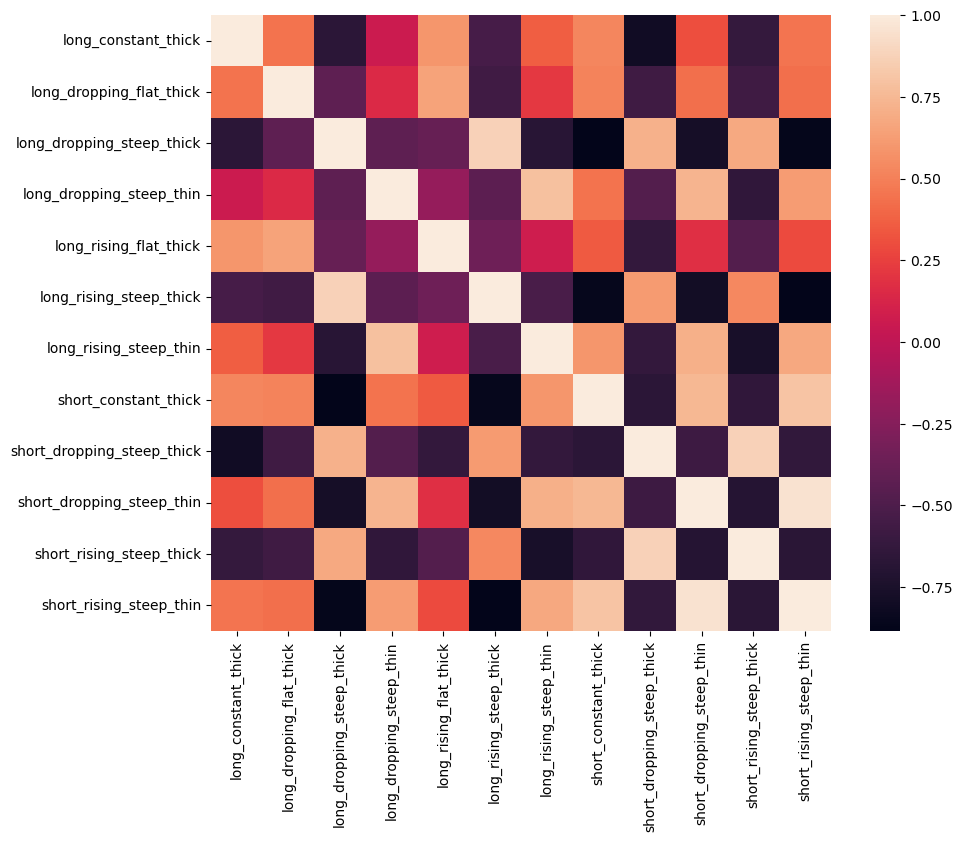

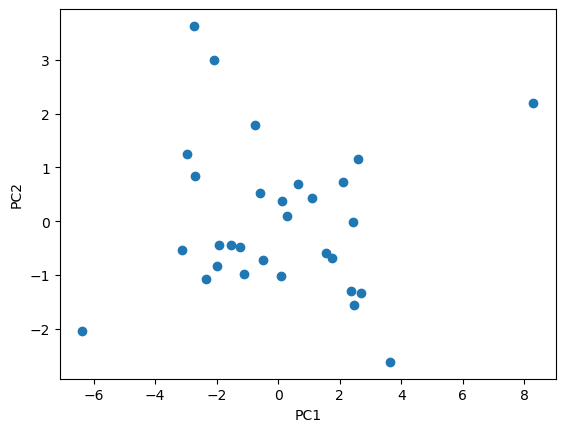

PCA Loadings:
[[-0.24626875 -0.2243773   0.33434964 -0.22647612 -0.17547261  0.31740677
  -0.28027951 -0.32070012  0.31702954 -0.31716743  0.31890339 -0.33193413]
 [ 0.36490896  0.33761817  0.00180942 -0.47364359  0.55741991  0.00640308
  -0.30076005 -0.01299479 -0.19192392 -0.25546739 -0.02230223 -0.15663558]]


In [5]:
# Idan-only correlation heatmap plus 2D PCA and loadings
plt.figure(figsize=(10,8))
sns.heatmap(df_idan.drop(columns=['wav_name']).corr(), annot=False)
plt.show()

X = df_idan.drop(columns=['wav_name'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
print('PCA Loadings:')
print(pca.components_)

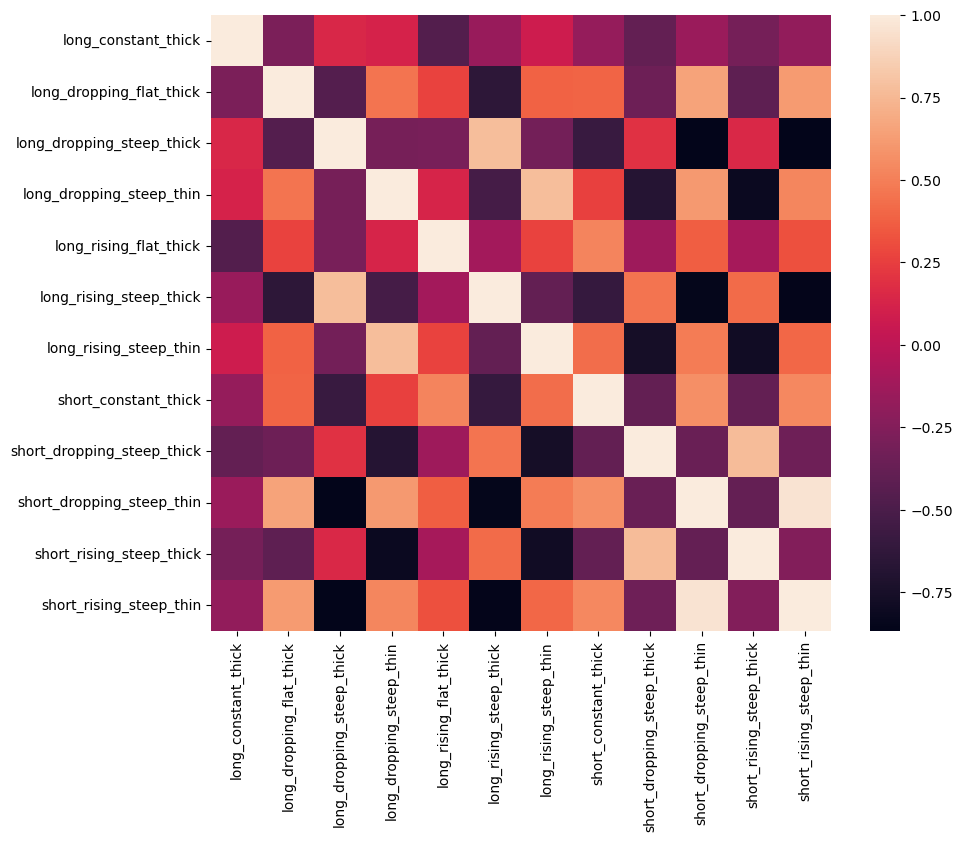

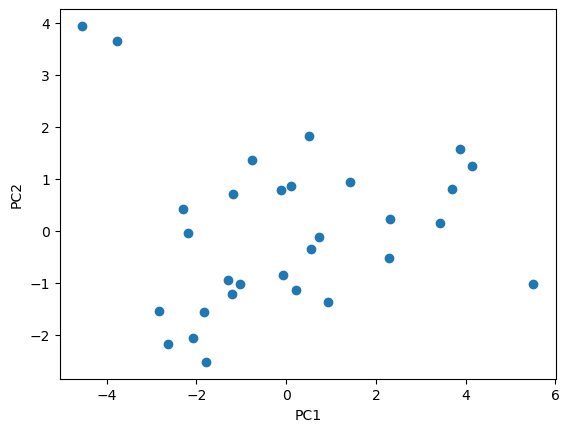

PCA Loadings:
[[ 0.01213038 -0.29028382  0.30612319 -0.31093804 -0.1587936   0.35032605
  -0.29860075 -0.28258517  0.27035932 -0.37019324  0.27306439 -0.35147176]
 [-0.4617823   0.12183495 -0.29333641 -0.28660875  0.26453365 -0.07563995
  -0.28741368  0.1506679   0.39705886  0.19017911  0.41534634  0.2374431 ]]


In [6]:
# Yoav-only correlation heatmap plus 2D PCA and loadings


plt.figure(figsize=(10,8))
sns.heatmap(df_yoav.drop(columns=['wav_name']).corr(), annot=False)
plt.show()


X = df_yoav.drop(columns=['wav_name'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
print('PCA Loadings:')
print(pca.components_)

# Speaker Statistical Comparison
This section computes mean, variance, and concept differences per speaker.

In [7]:
# Reload data and compute per-speaker means and variances


df = pd.read_csv('tcav.csv')
speakers = {'eden': df[df.wav_name.str.startswith('eden')],
            'idan': df[df.wav_name.str.startswith('idan')],
            'yoav': df[df.wav_name.str.startswith('yoav')]}
means = {sp: speakers[sp].drop(columns=['wav_name']).mean() for sp in speakers} # compute per-speaker means
vars_ = {sp: speakers[sp].drop(columns=['wav_name']).var() for sp in speakers} # compute per-speaker variances
means_df = pd.DataFrame(means)
vars_df = pd.DataFrame(vars_)
print("Per-speaker Means:")
print(means_df)
print("\nPer-speaker Variances:")
print(vars_df)

Per-speaker Means:
                                eden          idan      yoav
long_constant_thick         0.000011  1.485245e-05 -0.000012
long_dropping_flat_thick   -0.000002 -2.961587e-06  0.000009
long_dropping_steep_thick  -0.000029 -3.831501e-06 -0.000018
long_dropping_steep_thin    0.000026  5.724029e-06  0.000029
long_rising_flat_thick     -0.000011 -2.189821e-06  0.000004
long_rising_steep_thick    -0.000020  2.622455e-06 -0.000023
long_rising_steep_thin      0.000028  1.030201e-05  0.000031
short_constant_thick       -0.000013  1.083134e-06  0.000010
short_dropping_steep_thick -0.000009 -1.003805e-05 -0.000012
short_dropping_steep_thin   0.000027  2.182885e-07  0.000021
short_rising_steep_thick   -0.000013 -1.160379e-05 -0.000011
short_rising_steep_thin     0.000026 -2.241180e-06  0.000029

Per-speaker Variances:
                                    eden          idan          yoav
long_constant_thick         4.614276e-09  8.176732e-10  3.083282e-09
long_dropping_flat_thick  

## Concept Differences Between Speakers

In [8]:
# Compute pairwise mean differences between speakers
diff_eden_idan = means_df['eden'] - means_df['idan']
diff_eden_yoav = means_df['eden'] - means_df['yoav']
diff_idan_yoav = means_df['idan'] - means_df['yoav']
diffs = pd.DataFrame({
    'eden_minus_idan': diff_eden_idan,
    'eden_minus_yoav': diff_eden_yoav,
    'idan_minus_yoav': diff_idan_yoav
})
diffs

,eden_minus_idan,eden_minus_yoav,idan_minus_yoav
long_constant_thick,-3.770711e-06,0.000023,2.720051e-05
long_dropping_flat_thick,6.140931e-07,-0.000012,-1.212809e-05
long_dropping_steep_thick,-2.507634e-05,-0.000011,1.433030e-05
long_dropping_steep_thin,2.045074e-05,-0.000003,-2.355697e-05
long_rising_flat_thick,-8.545504e-06,-0.000015,-6.212288e-06
long_rising_steep_thick,-2.311979e-05,0.000003,2.588746e-05
long_rising_steep_thin,1.779265e-05,-0.000003,-2.118822e-05
short_constant_thick,-1.414125e-05,-0.000023,-8.551923e-06
short_dropping_steep_thick,1.312787e-06,0.000003,1.794532e-06
short_dropping_steep_thin,2.670625e-05,0.000006,-2.039070e-05


In [9]:
# Rank concepts by max absolute difference; build subsets and add speaker labels

diffs['max_abs_diff'] = diffs.abs().max(axis=1)

sorted_concepts = diffs['max_abs_diff'].sort_values(ascending=False)
subset_A = sorted_concepts.head(3).index.tolist()
subset_B = sorted_concepts.head(5).index.tolist()
subset_C = diffs[diffs['max_abs_diff'] > 0.00001].index.tolist() # TODO: adjust threshold - i picked this accourding to the last chart

print("Subset A (Top 3 strongest concepts):")
print(subset_A, "\n")
print("Subset B (Top 5 strongest concepts):")
print(subset_B, "\n")
print("Subset C (All |diff| > 0.00001):")
print(subset_C, "\n")
print("Full sorted table:")
display(sorted_concepts)
df['speaker'] = df['wav_name'].apply(lambda x: x.split('_')[0]) # Add speaker column


Subset A (Top 3 strongest concepts):
['short_rising_steep_thin', 'long_constant_thick', 'short_dropping_steep_thin'] 

Subset B (Top 5 strongest concepts):
['short_rising_steep_thin', 'long_constant_thick', 'short_dropping_steep_thin', 'long_rising_steep_thick', 'long_dropping_steep_thick'] 

Subset C (All |diff| > 0.00001):
['long_constant_thick', 'long_dropping_flat_thick', 'long_dropping_steep_thick', 'long_dropping_steep_thin', 'long_rising_flat_thick', 'long_rising_steep_thick', 'long_rising_steep_thin', 'short_constant_thick', 'short_dropping_steep_thin', 'short_rising_steep_thin'] 

Full sorted table:


short_rising_steep_thin       0.000031
long_constant_thick           0.000027
short_dropping_steep_thin     0.000027
long_rising_steep_thick       0.000026
long_dropping_steep_thick     0.000025
long_dropping_steep_thin      0.000024
short_constant_thick          0.000023
long_rising_steep_thin        0.000021
long_rising_flat_thick        0.000015
long_dropping_flat_thick      0.000012
short_dropping_steep_thick    0.000003
short_rising_steep_thick      0.000002
Name: max_abs_diff, dtype: float64

In [10]:
# Helper: 2D PCA on selected TCAV columns, colored by speaker
def run_pca(df, cols, title):
    X = df[cols]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure(figsize=(6,5))
    for sp in df['speaker'].unique():
        idx = df['speaker'] == sp
        plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=sp)

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(title)
    plt.legend()
    plt.show()

    print('Explained variance:', pca.explained_variance_ratio_)
    print('Loadings:')
    load = pd.DataFrame(pca.components_, columns=cols)
    display(load)


## PCA Subset A (Top 3 Concepts)

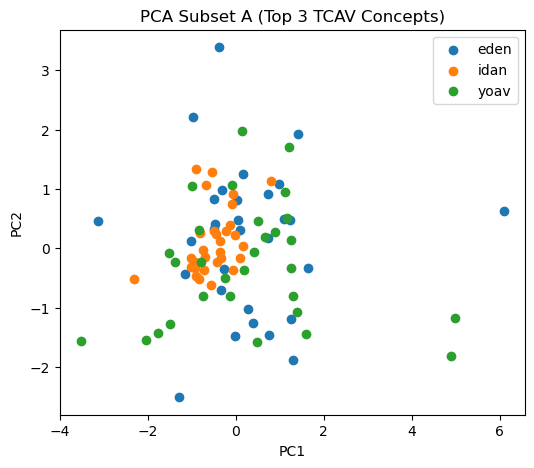

Explained variance: [0.65390828 0.32757754]
Loadings:


,short_rising_steep_thin,long_constant_thick,short_dropping_steep_thin
0,0.700531,-0.132956,0.701127
1,0.098577,0.991101,0.089452


In [11]:
run_pca(df, subset_A, 'PCA Subset A (Top 3 TCAV Concepts)')

## PCA Subset B (Top 5 Concepts)

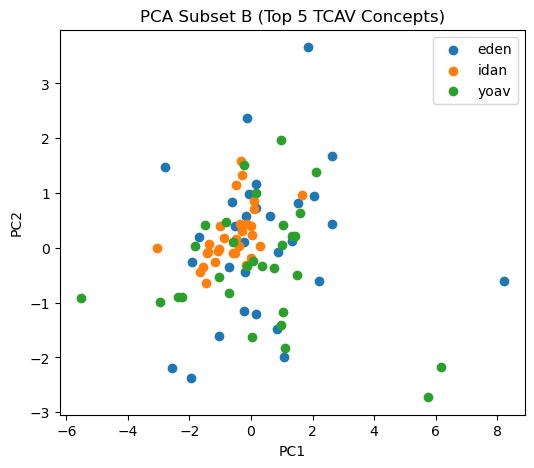

Explained variance: [0.68863544 0.22158886]
Loadings:


,short_rising_steep_thin,long_constant_thick,short_dropping_steep_thin,long_rising_steep_thick,long_dropping_steep_thick
0,0.516510,0.043229,0.504420,-0.484465,-0.492141
1,-0.177942,0.936623,-0.196632,-0.202622,-0.106557


In [12]:
run_pca(df, subset_B, 'PCA Subset B (Top 5 TCAV Concepts)')

## PCA Subset C (All Strong Concepts)

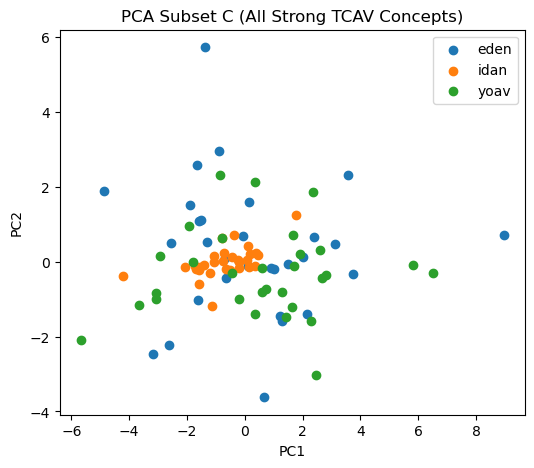

Explained variance: [0.51956776 0.16356066]
Loadings:


,long_constant_thick,long_dropping_flat_thick,long_dropping_steep_thick,long_dropping_steep_thin,long_rising_flat_thick,long_rising_steep_thick,long_rising_steep_thin,short_constant_thick,short_dropping_steep_thin,short_rising_steep_thin
0,-0.035528,0.304324,-0.353181,0.336169,0.181734,-0.367489,0.316936,0.28821,0.400869,0.395085
1,0.643169,-0.166496,-0.278257,-0.117644,-0.528352,-0.344468,-0.235465,-0.01351,0.052413,0.105634


In [13]:
run_pca(df, subset_C, 'PCA Subset C (All Strong TCAV Concepts)')

In [14]:
# Helper: 3D PCA on selected TCAV columns with speaker coloring


def run_pca_3d(df, cols, title):
    # Extract and scale data
    X = df[cols]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # PCA 3 components
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X_scaled)

    # Plot
    fig = plt.figure(figsize=(8,7))
    ax = fig.add_subplot(111, projection='3d')

    for sp in df['speaker'].unique():
        idx = df['speaker'] == sp
        ax.scatter(
            X_pca[idx, 0],
            X_pca[idx, 1],
            X_pca[idx, 2],
            label=sp
        )

    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    plt.title(title)
    plt.legend()
    plt.show()

    # Print explained variance + loadings
    print("Explained variance ratio:", pca.explained_variance_ratio_)
    print("Loadings:")
    loadings = pd.DataFrame(pca.components_, columns=cols)
    display(loadings)


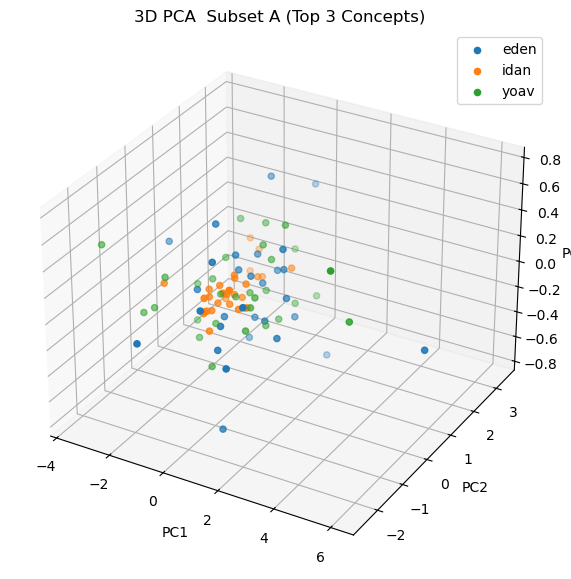

Explained variance ratio: [0.65390828 0.32757754 0.01851418]
Loadings:


,short_rising_steep_thin,long_constant_thick,short_dropping_steep_thin
0,0.700531,-0.132956,0.701127
1,0.098577,0.991101,0.089452
2,0.706780,-0.006451,-0.707404


In [15]:
run_pca_3d(df, subset_A, "3D PCA  Subset A (Top 3 Concepts)")


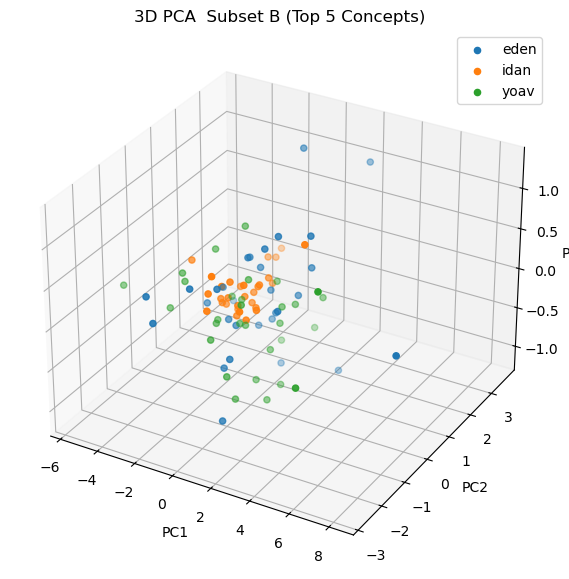

Explained variance ratio: [0.68863544 0.22158886 0.04372876]
Loadings:


,short_rising_steep_thin,long_constant_thick,short_dropping_steep_thin,long_rising_steep_thick,long_dropping_steep_thick
0,0.516510,0.043229,0.504420,-0.484465,-0.492141
1,-0.177942,0.936623,-0.196632,-0.202622,-0.106557
2,0.005030,0.027262,-0.127370,0.642371,-0.755227


In [16]:
run_pca_3d(df, subset_B, "3D PCA  Subset B (Top 5 Concepts)")


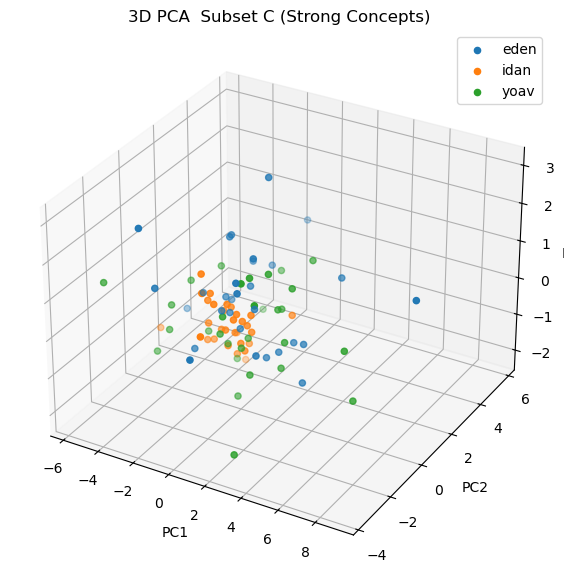

Explained variance ratio: [0.51956776 0.16356066 0.08846109]
Loadings:


,long_constant_thick,long_dropping_flat_thick,long_dropping_steep_thick,long_dropping_steep_thin,long_rising_flat_thick,long_rising_steep_thick,long_rising_steep_thin,short_constant_thick,short_dropping_steep_thin,short_rising_steep_thin
0,-0.035528,0.304324,-0.353181,0.336169,0.181734,-0.367489,0.316936,0.288210,0.400869,0.395085
1,0.643169,-0.166496,-0.278257,-0.117644,-0.528352,-0.344468,-0.235465,-0.013510,0.052413,0.105634
2,-0.088877,-0.291680,0.060646,0.434678,-0.320910,0.144632,0.340070,-0.636444,0.204863,0.166796


In [17]:
run_pca_3d(df, subset_C, "3D PCA  Subset C (Strong Concepts)")


In [18]:
# Helper: KMeans clustering on selected TCAV cols + PCA visualizations and accuracy
speaker_markers = {
    'yoav': '^',
    'idan': 'o',
    'eden': 's'
}


def run_kmeans(df, cols, title):

    X = df[cols]
    speaker_map = {'eden': 0, 'idan': 1, 'yoav': 2}
    y_true = df['speaker'].map(speaker_map).values

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # KMeans
    kmeans = KMeans(
        n_clusters=3,
        n_init=20,
        random_state=42,
        algorithm="elkan"
    )
    y_pred = kmeans.fit_predict(X_scaled)

    # Evaluate clustering quality
    cm = confusion_matrix(y_true, y_pred)
    row_ind, col_ind = linear_sum_assignment(-cm)
    accuracy = cm[row_ind, col_ind].sum() / cm.sum()

    print("Confusion matrix:\n", cm)
    print("\nBest-mapped cluster accuracy:", accuracy)
    print("\nCluster sizes:", np.unique(y_pred, return_counts=True), "\n")


    pca2 = PCA(n_components=2)
    X_pca2 = pca2.fit_transform(X_scaled)

    plt.figure(figsize=(7,6))

    # plot clusters
    for cluster in np.unique(y_pred):
        idx = (y_pred == cluster)
        plt.scatter(X_pca2[idx, 0], X_pca2[idx, 1],
                    label=f"Cluster {cluster}", alpha=0.4)

    for sp in df['speaker'].unique():
        idx = df['speaker'] == sp
        plt.scatter(
            X_pca2[idx, 0],
            X_pca2[idx, 1],
            marker=speaker_markers.get(sp, 'o'),
            facecolor="none",
            edgecolor="black",
            s=140,
            linewidths=1.4,
            label=f"Speaker {sp}"
        )

    plt.title(title + " - PCA2")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend()
    plt.show()


    pca3 = PCA(n_components=3)
    X_pca3 = pca3.fit_transform(X_scaled)

    fig = plt.figure(figsize=(8,7))
    ax = fig.add_subplot(111, projection="3d")

    # plot clusters
    for cluster in np.unique(y_pred):
        idx = (y_pred == cluster)
        ax.scatter(
            X_pca3[idx,0],
            X_pca3[idx,1],
            X_pca3[idx,2],
            alpha=0.4,
            label=f"Cluster {cluster}"
        )

    for sp in df['speaker'].unique():
        idx = df['speaker'] == sp
        ax.scatter(
            X_pca3[idx,0],
            X_pca3[idx,1],
            X_pca3[idx,2],
            marker=speaker_markers.get(sp, 'o'),
            facecolor="none",
            edgecolor="black",
            s=180,
            linewidths=1.5,
            label=f"Speaker {sp}"
        )

    ax.set_title(title + " - PCA3")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    plt.legend()
    plt.show()


Confusion matrix:
 [[11 18  1]
 [16 14  0]
 [12 16  2]]

Best-mapped cluster accuracy: 0.4

Cluster sizes: (array([0, 1, 2]), array([39, 48,  3], dtype=int64)) 



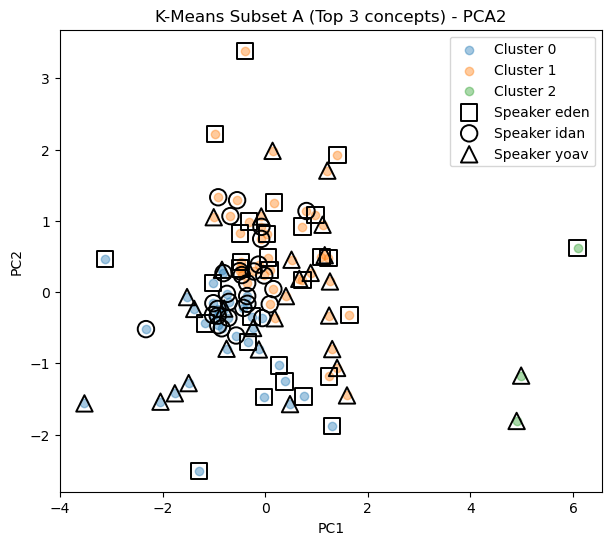

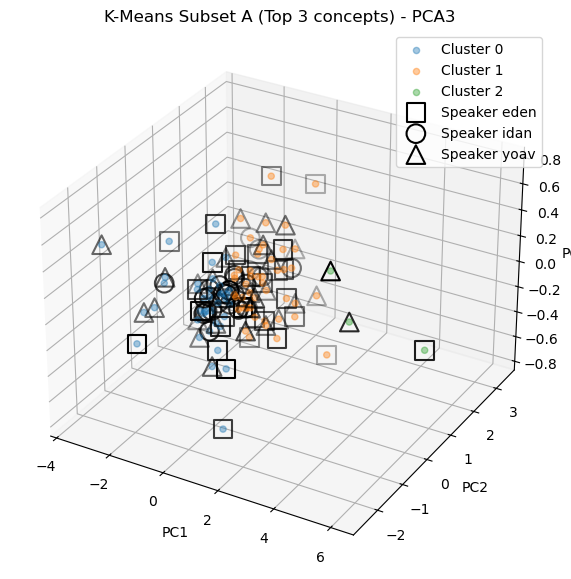

In [19]:
run_kmeans(df, subset_A, "K-Means Subset A (Top 3 concepts)")


Confusion matrix:
 [[ 8  1 21]
 [14  0 16]
 [11  2 17]]

Best-mapped cluster accuracy: 0.4111111111111111

Cluster sizes: (array([0, 1, 2]), array([33,  3, 54], dtype=int64)) 



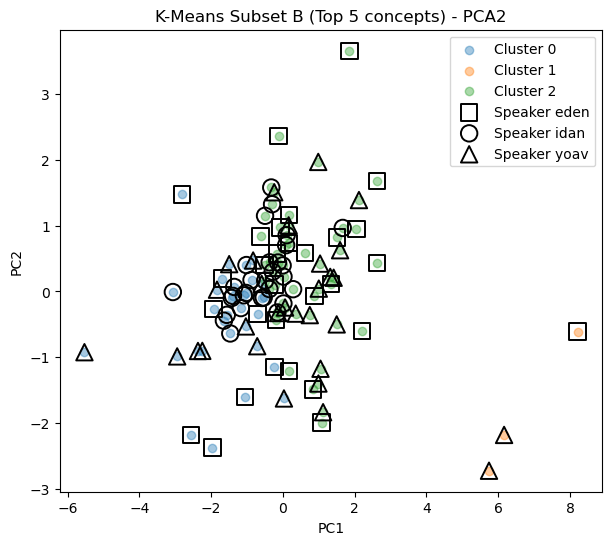

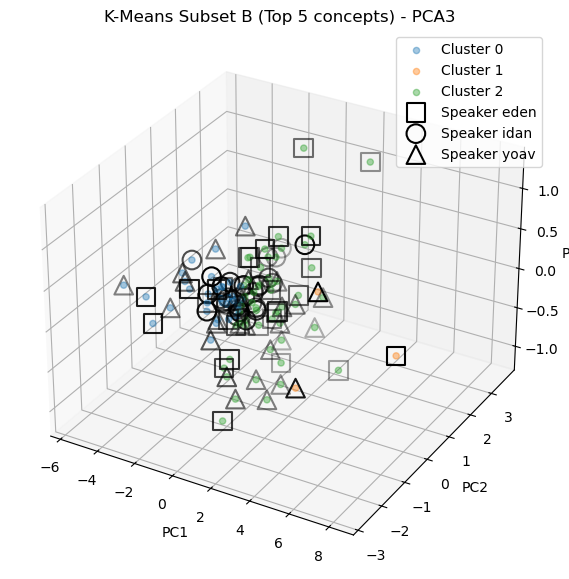

In [20]:
run_kmeans(df, subset_B, "K-Means Subset B (Top 5 concepts)")

Confusion matrix:
 [[ 1 15 14]
 [ 0 11 19]
 [ 2 18 10]]

Best-mapped cluster accuracy: 0.4222222222222222

Cluster sizes: (array([0, 1, 2]), array([ 3, 44, 43], dtype=int64)) 



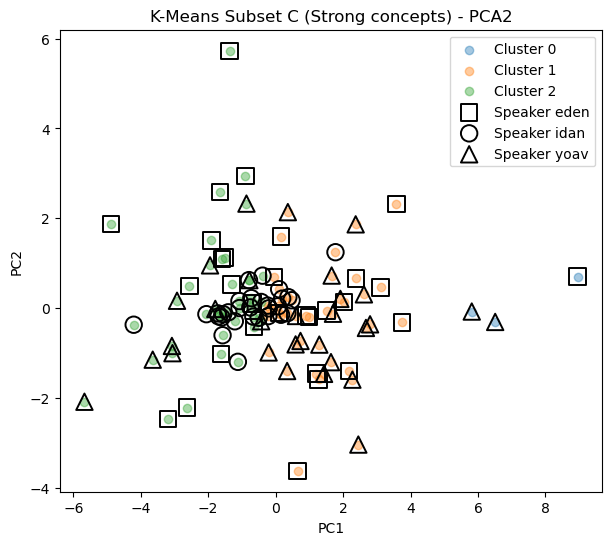

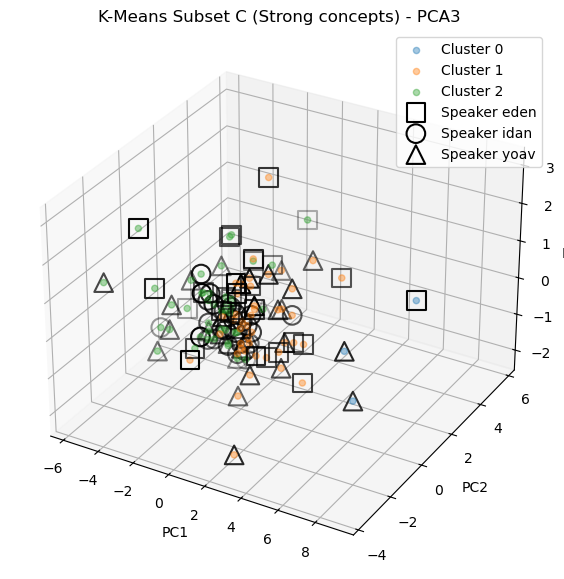

In [21]:
run_kmeans(df, subset_C, "K-Means Subset C (Strong concepts)")


In [22]:
# Helper: UMAP (2D/3D) on scaled data with KMeans evaluation


def run_umap(df, cols, title):


    X = df[cols]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # True numeric speaker labels
    speaker_map = {'eden':0, 'idan':1, 'yoav':2}
    y_true = df['speaker'].map(speaker_map).values


    kmeans = KMeans(
        n_clusters=3,
        n_init=20,
        random_state=42,
        algorithm="elkan"
    )
    y_pred = kmeans.fit_predict(X_scaled)

    # Evaluate (Hungarian matching)
    cm = confusion_matrix(y_true, y_pred)
    row_ind, col_ind = linear_sum_assignment(-cm)
    acc = cm[row_ind, col_ind].sum() / cm.sum()

    print("Confusion matrix:\n", cm)
    print("\nBest-mapped cluster accuracy:", acc, "\n")


    reducer2 = umap.UMAP(
        n_neighbors=15,
        min_dist=0.1,
        n_components=2,
        random_state=42
    )
    X_umap2 = reducer2.fit_transform(X_scaled)

    plt.figure(figsize=(7,6))
    for cl in np.unique(y_pred):
        idx = y_pred == cl
        plt.scatter(X_umap2[idx,0], X_umap2[idx,1], label=f"Cluster {cl}", alpha=0.6)

    for sp in df['speaker'].unique():
        idx = df['speaker'] == sp
        plt.scatter(
            X_umap2[idx, 0],
            X_umap2[idx, 1],
            marker=speaker_markers.get(sp, 'o'),
            facecolor="none",
            edgecolor="black",
            s=140,
            linewidths=1.4,
            label=f"Speaker {sp}"
        )

    plt.title(f"{title}  UMAP 2D + KMeans")
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    plt.legend()
    plt.show()

    reducer3 = umap.UMAP(
        n_neighbors=15,
        min_dist=0.1,
        n_components=3,
        random_state=42
    )
    X_umap3 = reducer3.fit_transform(X_scaled)

    fig = plt.figure(figsize=(8,7))
    ax = fig.add_subplot(111, projection="3d")

    for cl in np.unique(y_pred):
        idx = y_pred == cl
        ax.scatter(
            X_umap3[idx,0], X_umap3[idx,1], X_umap3[idx,2],
            label=f"Cluster {cl}", alpha=0.6
        )

    for sp in df['speaker'].unique():
        idx = df['speaker'] == sp
        ax.scatter(
            X_umap3[idx,0],
            X_umap3[idx,1],
            X_umap3[idx,2],
            marker=speaker_markers.get(sp, 'o'),
            facecolor="none",
            edgecolor="black",
            s=180,
            linewidths=1.5,
            label=f"Speaker {sp}"
        )

    ax.set_xlabel("UMAP 1")
    ax.set_ylabel("UMAP 2")
    ax.set_zlabel("UMAP 3")
    ax.set_title(f"{title} UMAP 3D + KMeans")
    plt.legend()
    plt.show()

    return acc


Confusion matrix:
 [[11 18  1]
 [16 14  0]
 [12 16  2]]

Best-mapped cluster accuracy: 0.4 



c:\Users\yoav1\anaconda3\envs\audio_env\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


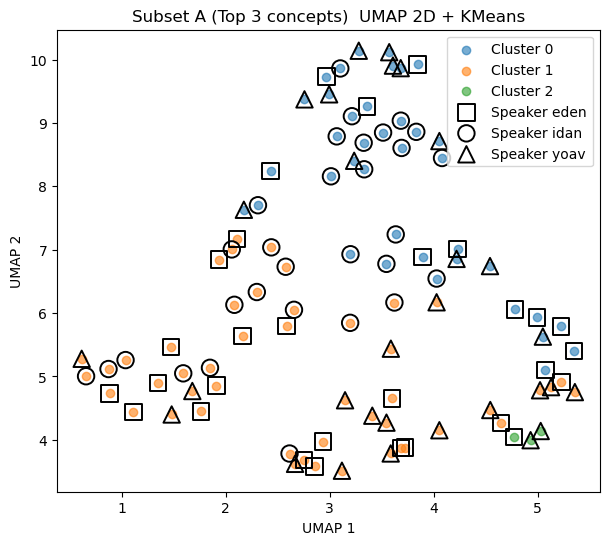

c:\Users\yoav1\anaconda3\envs\audio_env\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


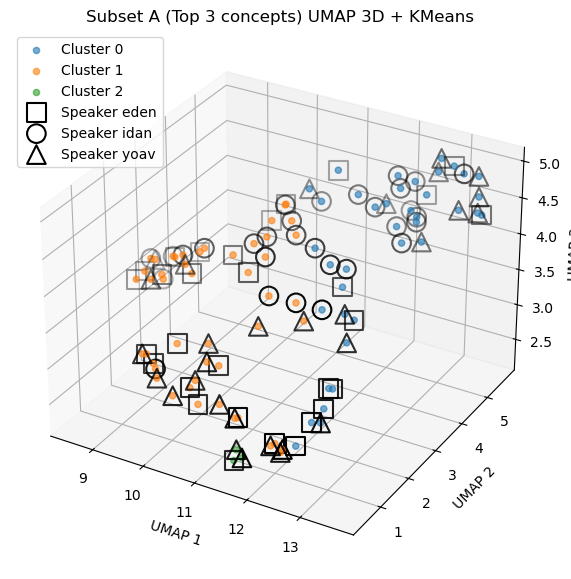

In [23]:
acc_A = run_umap(df, subset_A, "Subset A (Top 3 concepts)")


Confusion matrix:
 [[ 8  1 21]
 [14  0 16]
 [11  2 17]]

Best-mapped cluster accuracy: 0.4111111111111111 



c:\Users\yoav1\anaconda3\envs\audio_env\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


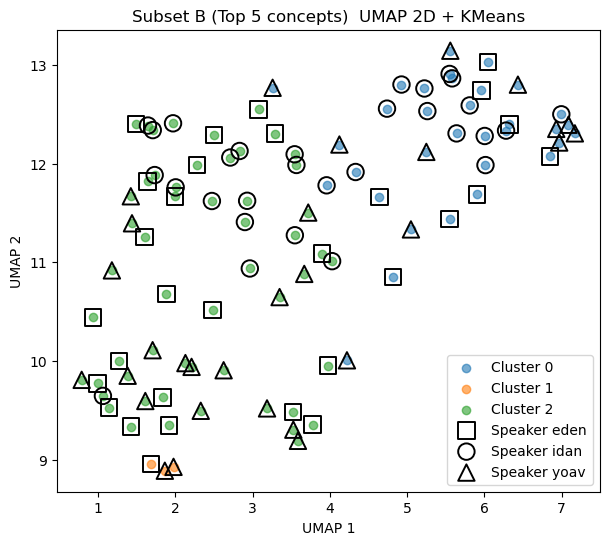

c:\Users\yoav1\anaconda3\envs\audio_env\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


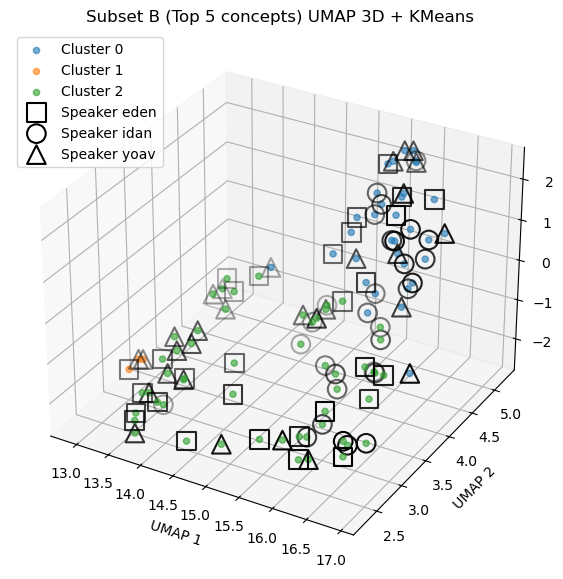

In [24]:
acc_B = run_umap(df, subset_B, "Subset B (Top 5 concepts)")


Confusion matrix:
 [[ 1 15 14]
 [ 0 11 19]
 [ 2 18 10]]

Best-mapped cluster accuracy: 0.4222222222222222 



c:\Users\yoav1\anaconda3\envs\audio_env\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


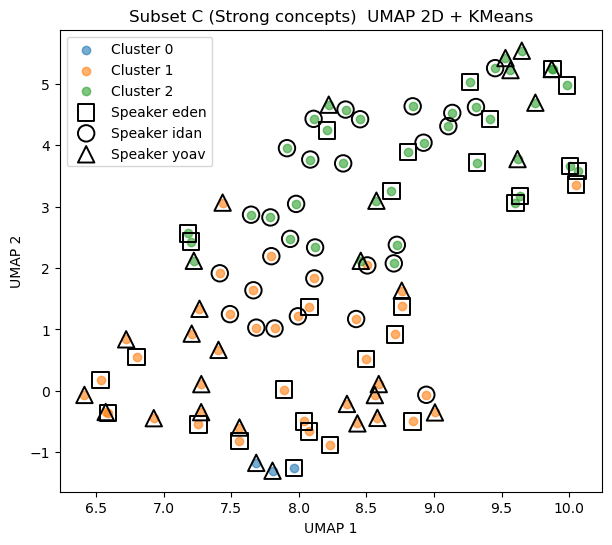

c:\Users\yoav1\anaconda3\envs\audio_env\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


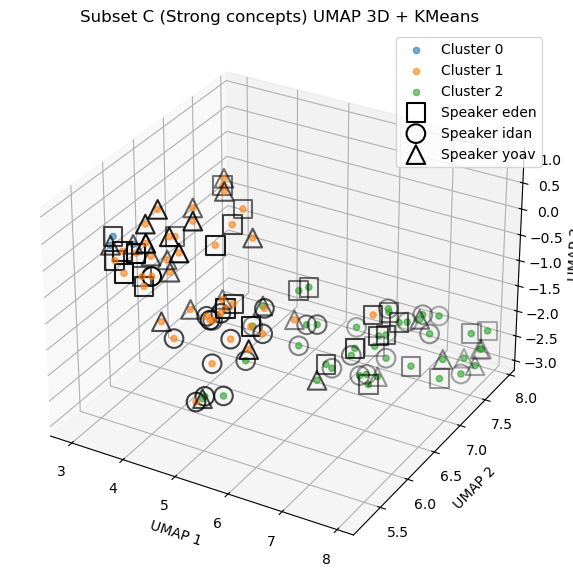

In [25]:
acc_C = run_umap(df, subset_C, "Subset C (Strong concepts)")


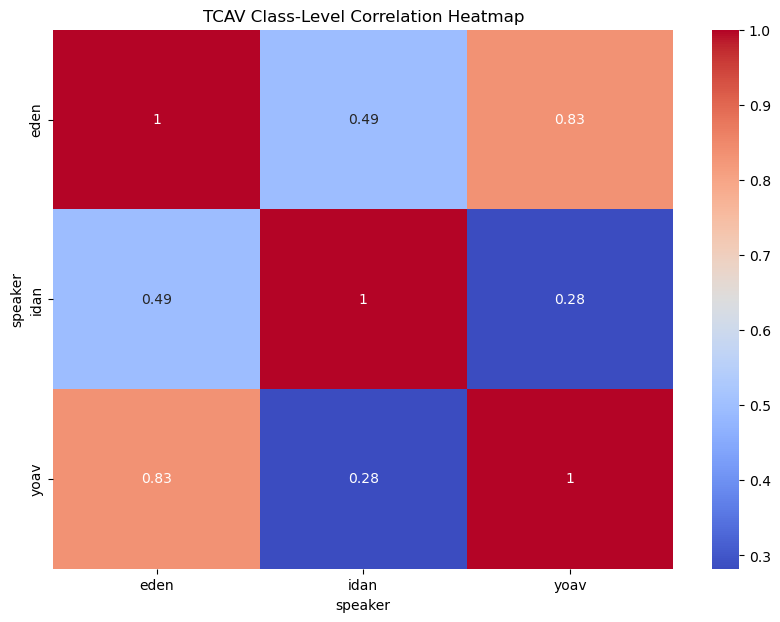

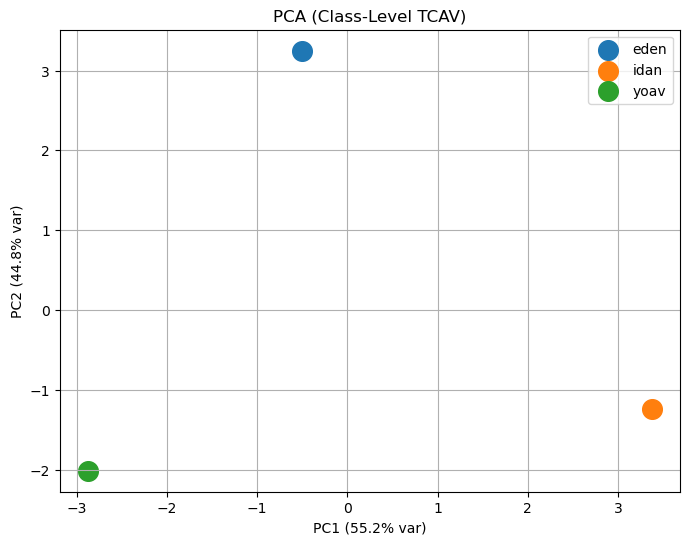

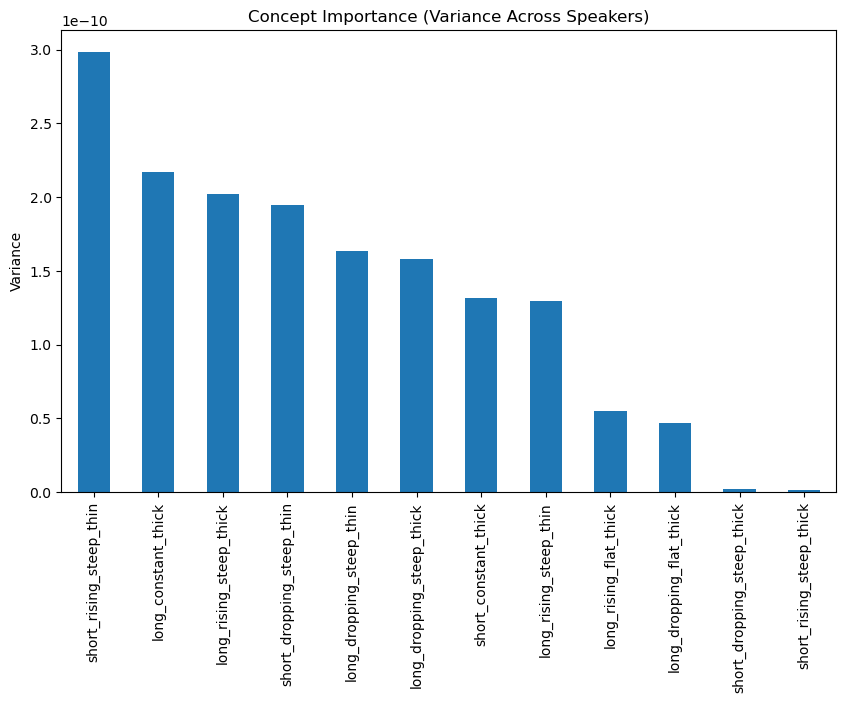

In [ ]:
# perform class-level analysis by averaging TCAV scores per speaker

df_class = df.copy()
df_class["speaker"] = df_class["wav_name"].apply(lambda x: x.split("_")[0])
concept_cols = [c for c in df_class.columns if c not in ["wav_name", "speaker"]]


tcav_per_class = df_class.groupby("speaker")[concept_cols].mean()
# tcav_per_class.to_csv("tcav_per_class.csv")


plt.figure(figsize=(10, 7))
sns.heatmap(tcav_per_class.T.corr(), annot=True, cmap="coolwarm")
plt.title("TCAV Class-Level Correlation Heatmap")
plt.show()


scaler = StandardScaler()
X_scaled = scaler.fit_transform(tcav_per_class)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(
    X_pca,
    columns=["PC1", "PC2"],
    index=tcav_per_class.index
)


plt.figure(figsize=(8, 6))
for spk in pca_df.index:
    plt.scatter(
        pca_df.loc[spk, "PC1"],
        pca_df.loc[spk, "PC2"],
        s=200,
        label=spk
    )

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
plt.title("PCA (Class-Level TCAV)")
plt.legend()
plt.grid(True)
plt.show()


loadings = pd.DataFrame(
    pca.components_.T,
    index=concept_cols,
    columns=["PC1", "PC2"]
)

concept_var = tcav_per_class.var().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
concept_var.plot(kind="bar")
plt.title("Concept Importance (Variance Across Speakers)")
plt.ylabel("Variance")
plt.show()
